# Explainability and Interpretability Testing Exercise
## Introduction
In this exercise, we'll explore explainability and interpretability in machine learning models using a customer churn dataset. We'll train a logistic regression model to predict whether a customer will churn (leave the service). Using SHAP (SHapley Additive exPlanations), we'll analyze feature importance and interpret the model's predictions.

### Step 0: Setup
Install and import the required libraries. SHAP will help with explainability, and scikit-learn will be used to train the model.

In [ ]:
# Install SHAP
!pip install shap scikit-learn

# Import required libraries
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Understand the Telco Customer Churn Dataset Features
Before diving into data preprocessing and modeling, it's important to understand the meaning of the columns in the dataset. Below is a description of the features we will use:

- **SeniorCitizen**: Indicates if the customer is a senior citizen (1: Yes, 0: No).
- **Partner**: Whether the customer has a partner (Yes or No).
- **Dependents**: Whether the customer has dependents (Yes or No).
- **Tenure**: The number of months the customer has been with the company.
- **MonthlyCharges**: The monthly fee the customer is charged.
- **TotalCharges**: Total amount charged to the customer.
- **Churn**: Target variable indicating if the customer churned (Yes or No).



### Step 1: Load and Prepare the Dataset
You'll load the dataset, preprocess it (handle missing values and encode categorical variables), and split it into training and testing sets.

In [ ]:
# Load the Telco Customer Churn dataset
url = "https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Select relevant features
features = ['SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'MonthlyCharges', 'TotalCharges']
target = 'Churn'

# Handle missing or invalid values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode categorical variables
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df = pd.get_dummies(df, columns=['Partner', 'Dependents'], drop_first=True)

# Update features list after one-hot encoding
features = ['SeniorCitizen', 'Partner_Yes', 'Dependents_Yes', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Split the data into features and target
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the prepared dataset
X.head()

<ipython-input-10-b034651a2b32>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


,SeniorCitizen,Partner_Yes,Dependents_Yes,tenure,MonthlyCharges,TotalCharges
0,0,True,False,1,29.85,29.85
1,0,False,False,34,56.95,1889.50
2,0,False,False,2,53.85,108.15
3,0,False,False,45,42.30,1840.75
4,0,False,False,2,70.70,151.65


### Step 2: Train a Logistic Regression Model
We'll train a logistic regression model to predict customer churn and evaluate its accuracy.

In [ ]:
# Train a logistic regression model
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.81


### Step 3: Explain Predictions Using SHAP
SHAP is a powerful library for model interpretability. We'll generate explanations for a few predictions and analyze which features contribute most to the predictions.

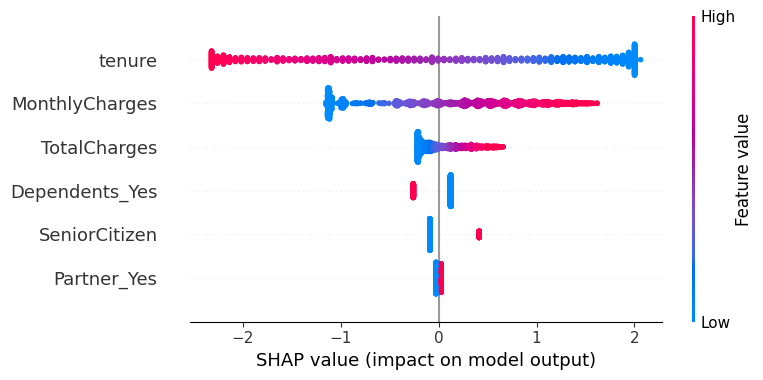

In [ ]:
# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Generate SHAP values for the test set
shap_values = explainer(X_test)

# Convert SHAP values to standard numpy array with float64 dtype
shap_values_array = shap_values.values.astype(np.float64)

# Create a new Explanation object with the converted SHAP values
shap_values = shap.Explanation(shap_values_array,
                                 data=shap_values.data,
                                 feature_names=shap_values.feature_names,
                                 base_values=shap_values.base_values)

# Visualize SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test)

### Questions:
1. Which feature has the highest average SHAP value? What does this tell you about its importance in predicting customer churn?
2. For the most significant feature, do higher values (red) increase or decrease the likelihood of churn? Why might this be the case?

### Step 4: Analyze Individual Predictions
SHAP also allows us to explain individual predictions. Let's analyze why the model predicted churn or no churn for a specific customer.

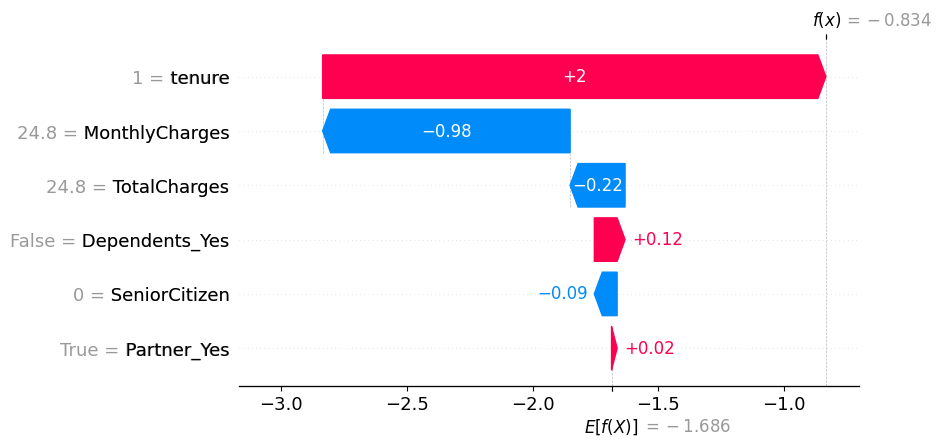

In [ ]:
# Select a specific instance from the test set
instance_index = 0  # Change this to analyze other instances
instance = X_test.iloc[instance_index]

# Explain the instance
shap.waterfall_plot(shap.Explanation(values=shap_values[instance_index].values,
                                     base_values=shap_values[instance_index].base_values,
                                     data=instance,
                                     feature_names=X_test.columns))

### Questions:
1. What does the base value represent in the waterfall plot? How does it relate to the average prediction probability for the dataset?
2. What is the final prediction for this customer (churn or no churn)? How do the contributions from individual features lead to this outcome?